In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
single = pd.read_csv('./rrt.csv')

In [9]:
single

,num explore,field width,field height,num mobiles,num statics,trial,uptime,elapsed time
0,1000,600,600,20,0,#0,623751,0.057723
1,1000,600,600,20,0,#1,0,0.015607
2,1000,600,600,20,0,#2,610224,0.024398
3,1000,600,600,20,0,#3,0,0.022155
4,1000,600,600,20,0,#4,0,0.013106
...,...,...,...,...,...,...,...,...
1195,1000,600,600,40,40,#95,698949,0.345822
1196,1000,600,600,40,40,#96,674936,0.063302
1197,1000,600,600,40,40,#97,0,0.033171
1198,1000,600,600,40,40,#98,665482,0.057459


In [10]:
single = single[single['uptime'] > 0]

In [11]:
len(single)

494

In [12]:
single_mean = single.drop(['num explore', 'trial'], axis=1).groupby(
  ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
single_mean

,field width,field height,num mobiles,num statics,uptime,elapsed time
0,600,600,20,0,631156.450000,0.039284
1,600,600,20,20,641529.621622,0.041877
2,600,600,20,30,637155.235294,0.038083
3,600,600,20,40,633691.421053,0.037914
4,600,600,30,0,670356.829268,0.070998
5,600,600,30,20,671008.479167,0.058603
6,600,600,30,30,667477.829268,0.060836
7,600,600,30,40,669720.904762,0.071402
8,600,600,40,0,682328.148936,0.139345
9,600,600,40,20,682770.166667,0.140860


In [13]:
single_mean = single_mean.groupby(['field width', 'field height'])

In [14]:
single_mean600 = single_mean.get_group((600, 600))
single_mean600

,field width,field height,num mobiles,num statics,uptime,elapsed time
0,600,600,20,0,631156.450000,0.039284
1,600,600,20,20,641529.621622,0.041877
2,600,600,20,30,637155.235294,0.038083
3,600,600,20,40,633691.421053,0.037914
4,600,600,30,0,670356.829268,0.070998
5,600,600,30,20,671008.479167,0.058603
6,600,600,30,30,667477.829268,0.060836
7,600,600,30,40,669720.904762,0.071402
8,600,600,40,0,682328.148936,0.139345
9,600,600,40,20,682770.166667,0.140860


In [15]:
num_sensors = single_mean600['num statics'] + single_mean600['num mobiles']
ratio_mobiles = single_mean600['num mobiles'] / num_sensors
single_mean600['num sensors'] = num_sensors
single_mean600['ratio of mobiles'] = ratio_mobiles

In [16]:
single_mean600

,field width,field height,num mobiles,num statics,uptime,elapsed time,num sensors,ratio of mobiles
0,600,600,20,0,631156.450000,0.039284,20,1.000000
1,600,600,20,20,641529.621622,0.041877,40,0.500000
2,600,600,20,30,637155.235294,0.038083,50,0.400000
3,600,600,20,40,633691.421053,0.037914,60,0.333333
4,600,600,30,0,670356.829268,0.070998,30,1.000000
5,600,600,30,20,671008.479167,0.058603,50,0.600000
6,600,600,30,30,667477.829268,0.060836,60,0.500000
7,600,600,30,40,669720.904762,0.071402,70,0.428571
8,600,600,40,0,682328.148936,0.139345,40,1.000000
9,600,600,40,20,682770.166667,0.140860,60,0.666667


In [17]:
uptimes = single_mean600['uptime'].values.reshape((3, 4)) / 3600
uptimes

array([[175.32123611, 178.20267267, 176.98756536, 176.02539474],
       [186.21023035, 186.39124421, 185.41050813, 186.03358466],
       [189.53559693, 189.65837963, 189.27404915, 189.78050694]])

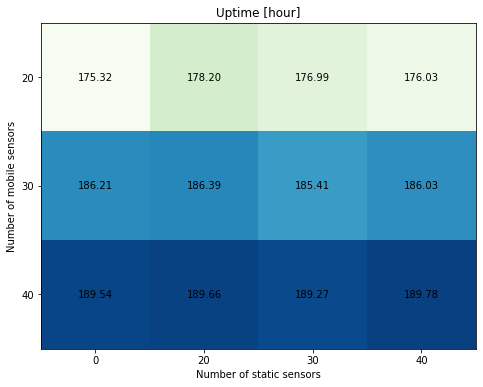

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.imshow(uptimes, cmap='GnBu')
ax.set_xticks(np.arange(uptimes.shape[1]))
ax.set_xticklabels(['0', '20', '30', '40'])
ax.set_yticks(np.arange(uptimes.shape[0]))
ax.set_yticklabels(['20', '30', '40'])
ax.set_xlabel('Number of static sensors')
ax.set_ylabel('Number of mobile sensors')
ax.set_title('Uptime [hour]')

for i in range(uptimes.shape[0]):
  for j in range(uptimes.shape[1]):
    ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
plt.show()

In [19]:
def plot_uptimes(file):
  data = pd.read_csv(file)
  data = data[data['uptime'] > 0]
  data = data.drop(['trial'], axis=1).groupby(
    ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
  data = data.groupby(['field width', 'field height'], as_index=False).get_group((600, 600))
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

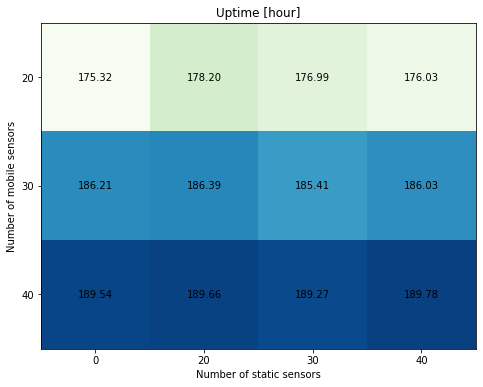

In [20]:
plot_uptimes('./rrt.csv')